In [1]:
# ignore warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import initial packages
import numpy as np
import pandas as pd
# settings to display all columns
pd.set_option("display.max_columns", None)

In [3]:
# import visualizations package
import matplotlib.pyplot as plt
import seaborn as sns
# import profiling package
import pandas_profiling as pp

In [4]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce

In [5]:
data=pd.read_csv('./train-data.csv')

In [6]:
# forming ProfileReport and save as output.html file
# generating initial report to get a feel of the data
#profile = pp.ProfileReport(data)
#profile.to_file("EDA_preliminary.html")

In [7]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [9]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
data.sort_values('Seats', ascending=True).head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.00
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0 kmpl,3436 CC,null bhp,2.0,NaN,40.00
5919,5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.5 kmpl,5000 CC,488.1 bhp,2.0,NaN,100.00
4893,4893,BMW Z4 2009-2013 Roadster 2.5i,Kochi,2018,9952,Petrol,Automatic,First,10.37 kmpl,2979 CC,306 bhp,2.0,NaN,58.54
4691,4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.0 kmpl,5461 CC,421 bhp,2.0,NaN,90.00


In [11]:
data = data[~(data['Kilometers_Driven'] > 400000)]
data = data[~(data['Mileage'] == '0.0 kmpl')]
data = data[~(data['Seats'] == 0.0)]

In [12]:
data.nunique()

Unnamed: 0           5943
Name                 1842
Location               11
Year                   22
Kilometers_Driven    3060
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               441
Engine                143
Power                 369
Seats                   8
New_Price             537
Price                1363
dtype: int64

In [13]:
data.drop([data.columns[0], 'Name','New_Price'], axis=1, inplace=True)

In [14]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [15]:
data.dropna(inplace=True)
y=data.iloc[:,-1]

In [16]:
data_cat=data.iloc[:,[0,1,3,4,5,9]]
data_num=data.iloc[:,[2,6,7,8]]
data=pd.concat([data,y],axis=1)

In [17]:
data_cat

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats
0,Mumbai,2010,CNG,Manual,First,5.0
1,Pune,2015,Diesel,Manual,First,5.0
2,Chennai,2011,Petrol,Manual,First,5.0
3,Chennai,2012,Diesel,Manual,First,7.0
4,Coimbatore,2013,Diesel,Automatic,Second,5.0
...,...,...,...,...,...,...
6014,Delhi,2014,Diesel,Manual,First,5.0
6015,Jaipur,2015,Diesel,Manual,First,5.0
6016,Jaipur,2012,Diesel,Manual,Second,8.0
6017,Kolkata,2013,Petrol,Manual,First,5.0


In [18]:
for i in data_cat.columns:
    print(data.groupby(i)['Price'].mean())

                Price      Price
Location                        
Ahmedabad    8.327182   8.327182
Bangalore   13.398040  13.398040
Chennai      7.720167   7.720167
Coimbatore  14.953863  14.953863
Delhi        9.732413   9.732413
Hyderabad    9.814074   9.814074
Jaipur       5.861383   5.861383
Kochi       11.163158  11.163158
Kolkata      5.644952   5.644952
Mumbai       9.387286   9.387286
Pune         6.700679   6.700679
          Price      Price
Year                      
1998   1.432500   1.432500
1999   0.835000   0.835000
2000   1.175000   1.175000
2001   1.780000   1.780000
2002   1.273636   1.273636
2003   1.631333   1.631333
2004   1.965385   1.965385
2005   2.103400   2.103400
2006   3.510000   3.510000
2007   3.259417   3.259417
2008   3.607744   3.607744
2009   5.252356   5.252356
2010   5.538209   5.538209
2011   6.871460   6.871460
2012   7.166815   7.166815
2013   8.669580   8.669580
2014   9.568020   9.568020
2015  11.162700  11.162700
2016  11.615705  11.615705
2017

In [19]:
data_num

,Kilometers_Driven,Mileage,Engine,Power
0,72000,26.6 km/kg,998 CC,58.16 bhp
1,41000,19.67 kmpl,1582 CC,126.2 bhp
2,46000,18.2 kmpl,1199 CC,88.7 bhp
3,87000,20.77 kmpl,1248 CC,88.76 bhp
4,40670,15.2 kmpl,1968 CC,140.8 bhp
...,...,...,...,...
6014,27365,28.4 kmpl,1248 CC,74 bhp
6015,100000,24.4 kmpl,1120 CC,71 bhp
6016,55000,14.0 kmpl,2498 CC,112 bhp
6017,46000,18.9 kmpl,998 CC,67.1 bhp


In [20]:
print(data_num['Mileage'].str.split().str[1].value_counts())
print(data_num['Engine'].str.split().str[1].value_counts())
print(data_num['Power'].str.split().str[1].value_counts())

kmpl     5845
km/kg      66
Name: Mileage, dtype: int64
CC    5911
Name: Engine, dtype: int64
bhp    5911
Name: Power, dtype: int64


In [21]:
mil=[]
for i in data_num.Mileage:
    if str(i).endswith('km/kg'):
        val=i[:-6]
        val=float(val)*1.33
        mil.append(float(val))
    else:
        val=i[:-5]
        val=float(val)
        mil.append(float(val))

In [22]:
data_num['Mileage']=mil

In [23]:
data_num['Engine']=data_num['Engine'].str.split().str[0]
data_num['Power']=data_num['Power'].str.split().str[0]

In [24]:
data_num['Power']=data_num['Power'].replace('null', np.mean(pd.to_numeric(data_num['Power'], errors='coerce')))

In [25]:
data_num['Engine']=data_num['Engine'].astype(float)
data_num['Power']=data_num['Power'].astype(float)

In [26]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5911 entries, 0 to 6018
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  5911 non-null   int64  
 1   Mileage            5911 non-null   float64
 2   Engine             5911 non-null   float64
 3   Power              5911 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 230.9 KB


In [27]:
data_cat

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats
0,Mumbai,2010,CNG,Manual,First,5.0
1,Pune,2015,Diesel,Manual,First,5.0
2,Chennai,2011,Petrol,Manual,First,5.0
3,Chennai,2012,Diesel,Manual,First,7.0
4,Coimbatore,2013,Diesel,Automatic,Second,5.0
...,...,...,...,...,...,...
6014,Delhi,2014,Diesel,Manual,First,5.0
6015,Jaipur,2015,Diesel,Manual,First,5.0
6016,Jaipur,2012,Diesel,Manual,Second,8.0
6017,Kolkata,2013,Petrol,Manual,First,5.0


In [28]:
data_cat.columns

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats'], dtype='object')

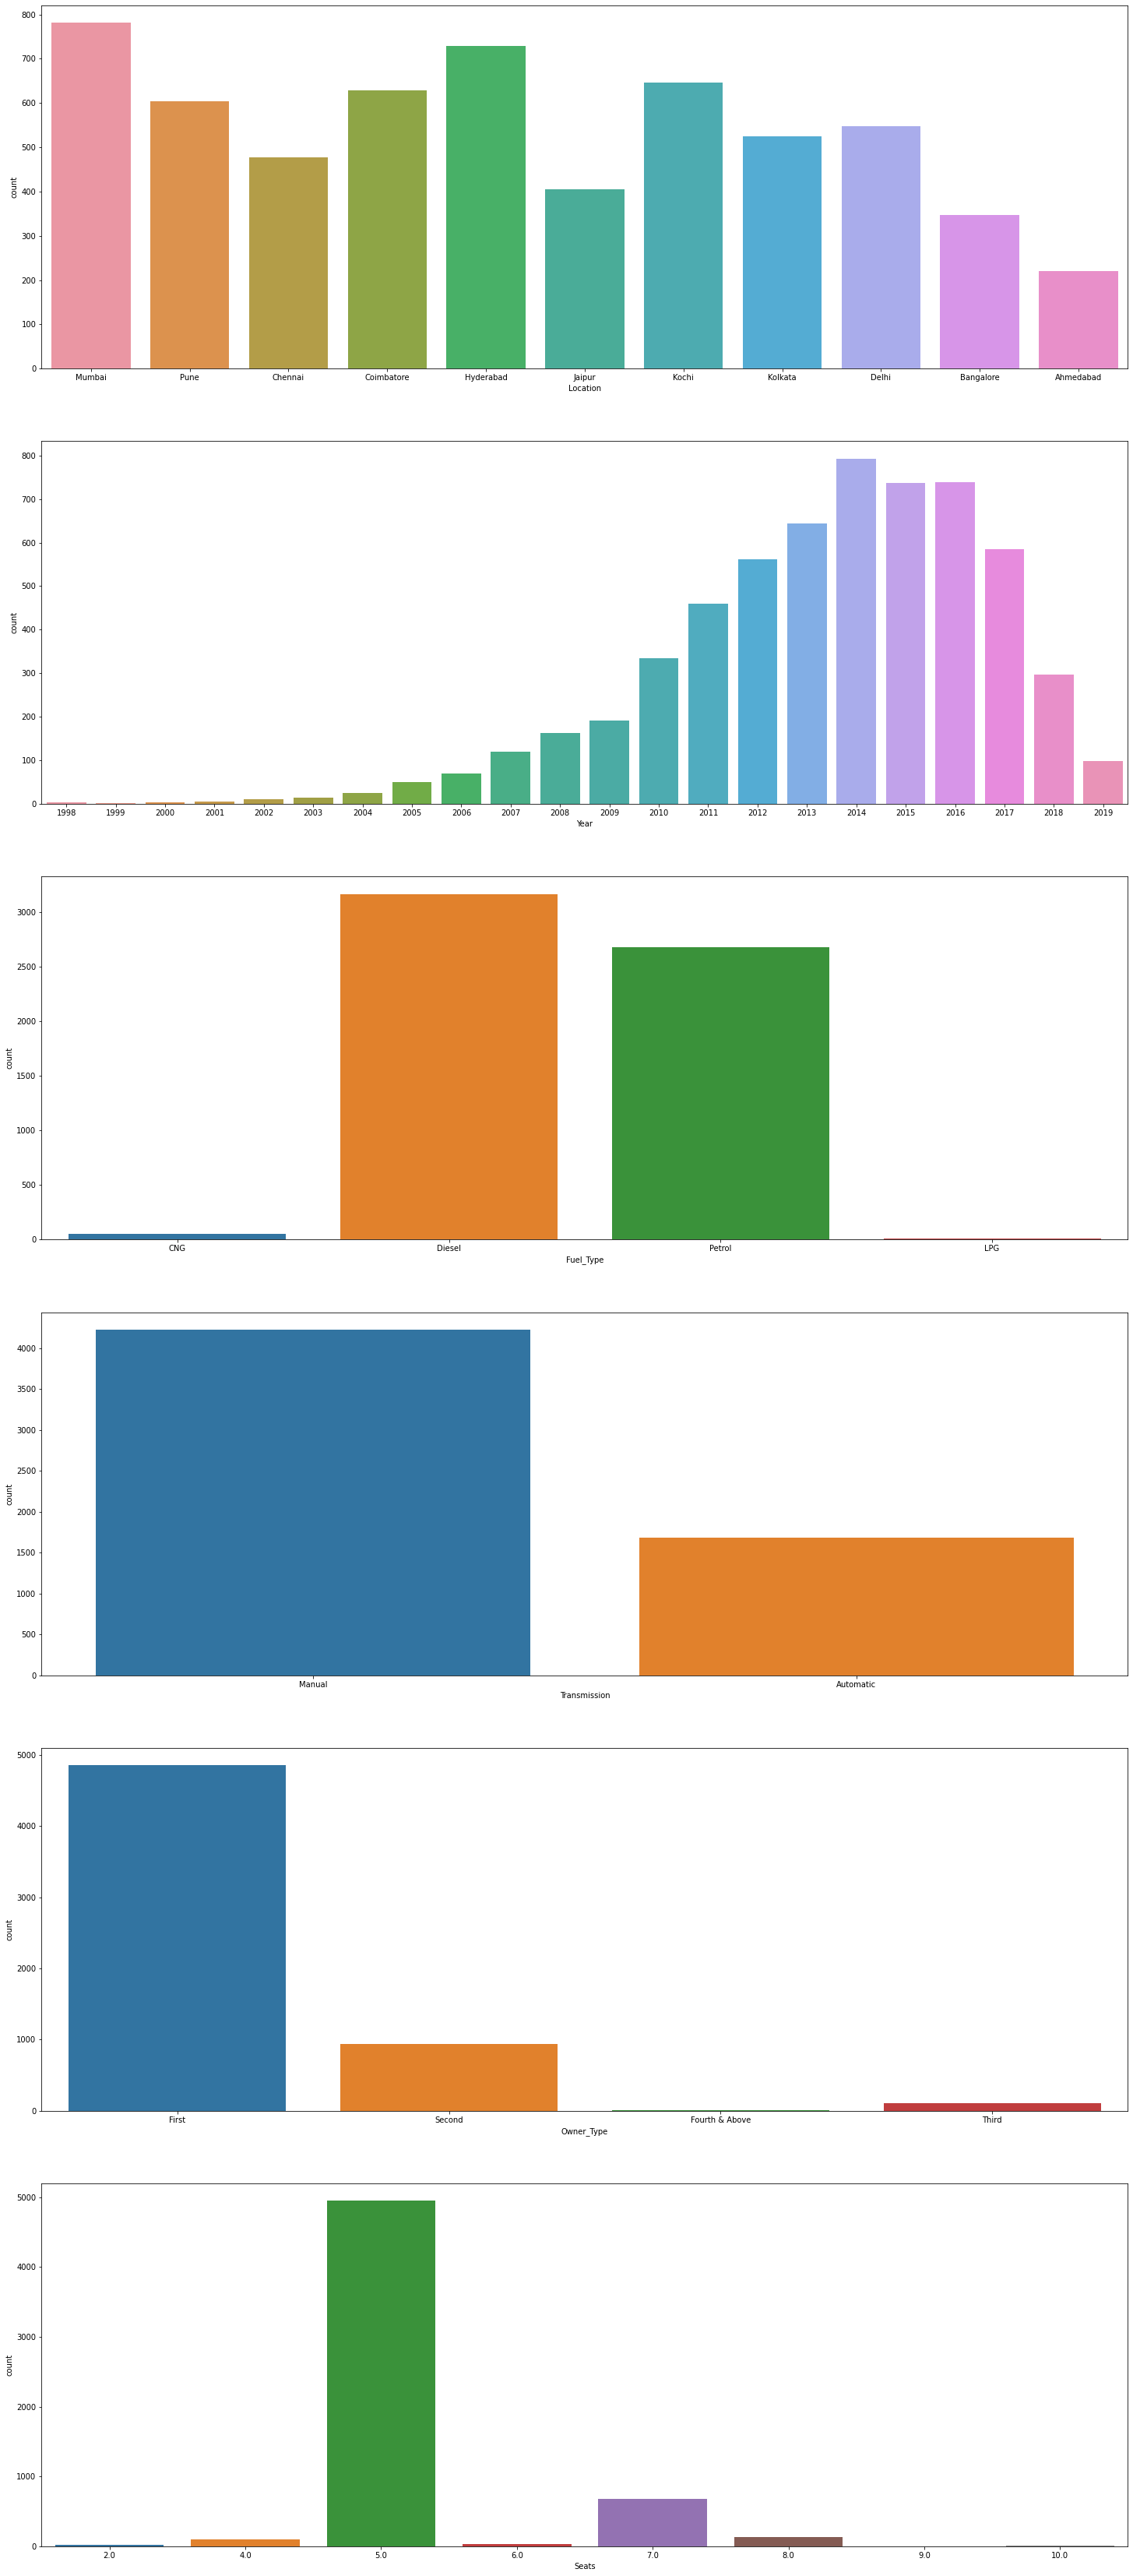

In [29]:
fig,axes = plt.subplots(nrows=6, figsize=(25,60))
for i,j in zip(data_cat.columns, range(0,6,1)):
    sns.countplot(x=data_cat[i], ax=axes[j])

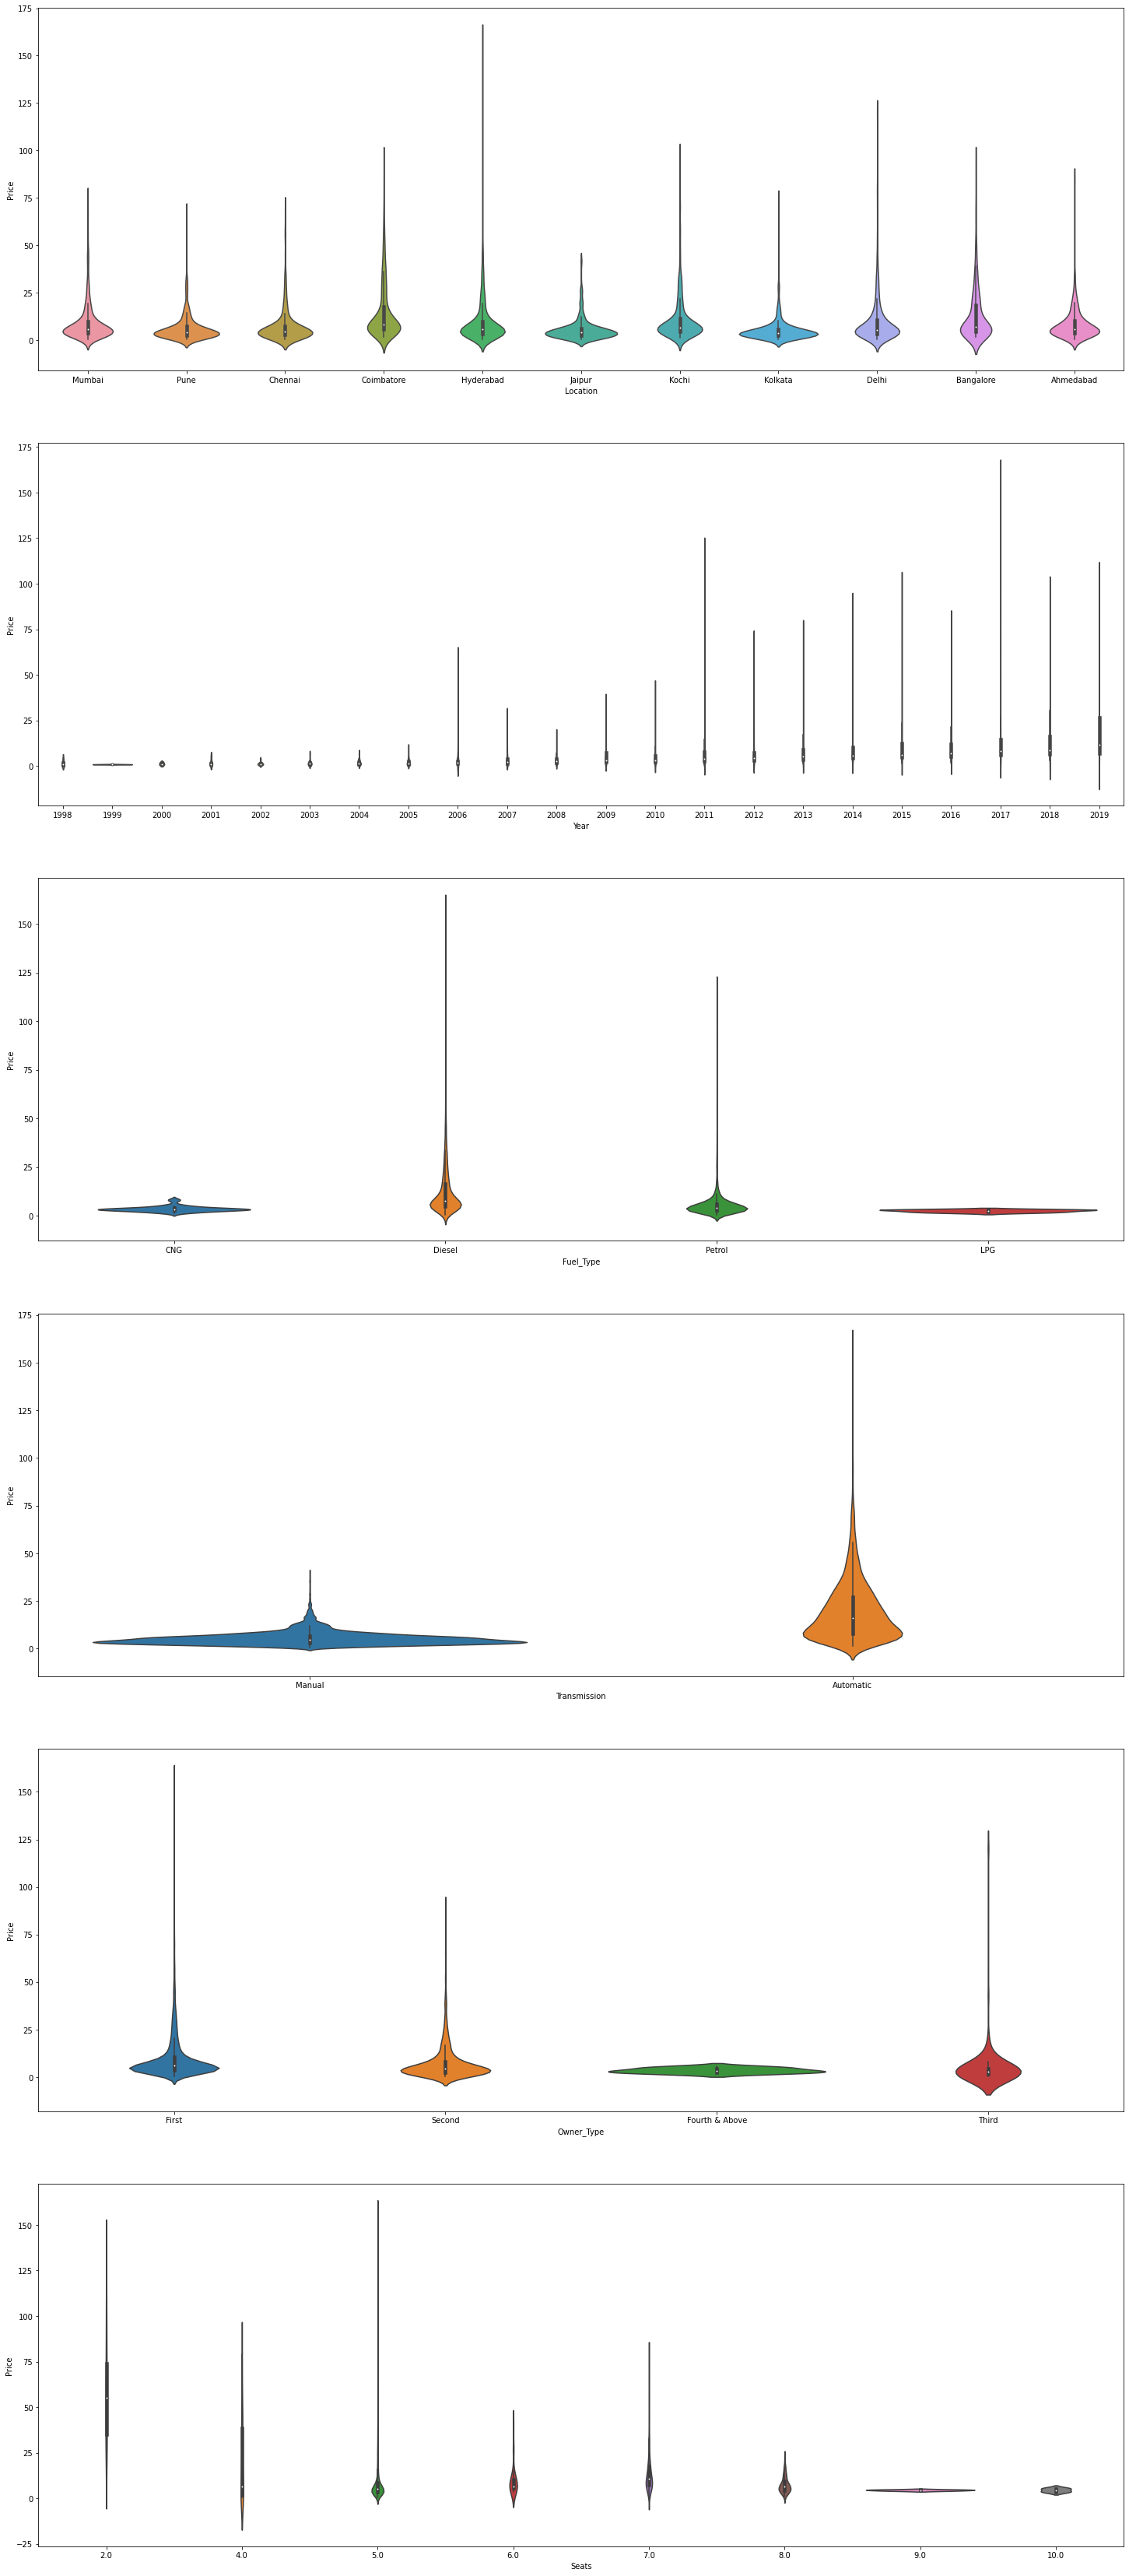

In [30]:
fig,axes = plt.subplots(nrows=6, figsize=(25,60))
for i,j in zip(data_cat.columns, range(0,6,1)):
    sns.violinplot(x=data_cat[i], y=y, ax=axes[j])

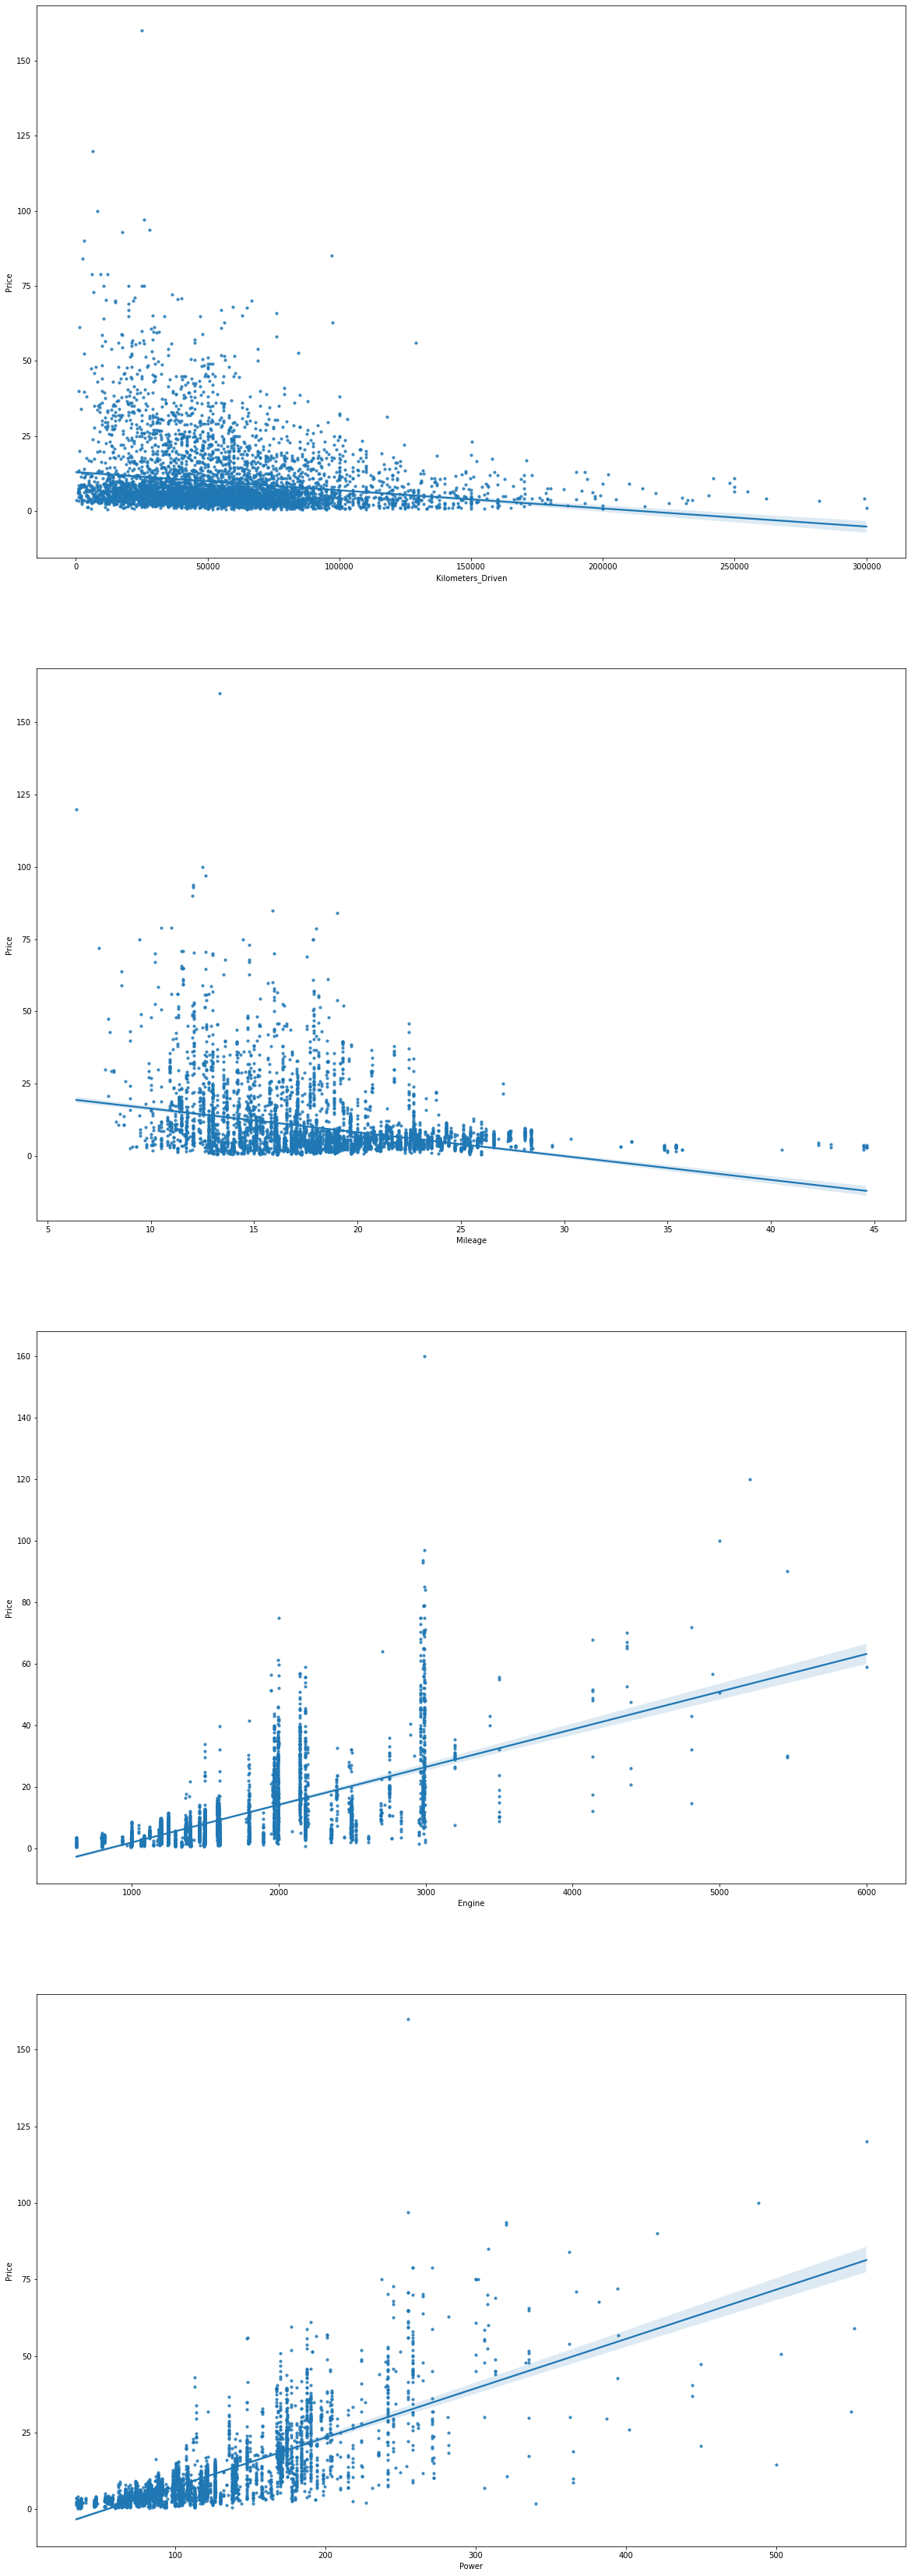

In [31]:
fig,axes = plt.subplots(nrows=4, figsize=(20,60))
for i,j in zip(data_num.columns, range(0,4,1)):
    sns.regplot(x=data_num[i], y=y, scatter_kws={'s':10}, ax=axes[j])

In [32]:
data_cat['Fuel_Type'].replace(to_replace=['CNG','LPG'],value='CNG/LPG',inplace=True)

In [33]:
l1 = [*range(1998, 2020, 1)]
l2 = [*range(1, 23, 1)]
year_dict = dict(zip(l1, l2))
print(year_dict)

{1998: 1, 1999: 2, 2000: 3, 2001: 4, 2002: 5, 2003: 6, 2004: 7, 2005: 8, 2006: 9, 2007: 10, 2008: 11, 2009: 12, 2010: 13, 2011: 14, 2012: 15, 2013: 16, 2014: 17, 2015: 18, 2016: 19, 2017: 20, 2018: 21, 2019: 22}


In [34]:
ordinal_cols_mapping = [{
    "col":"Owner_Type",    
    "mapping": {
        'First' : 1, 
        'Second' : 2, 
        'Third' : 3, 
        'Fourth & Above':4
    }},{
    "col":"Seats",    
    "mapping": {
        0.0 : 0, 
        2.0 : 2, 
        4.0 : 4, 
        5.0 : 5,
        6.0 : 6,
        7.0 : 7,
        8.0 : 8,
        9.0 : 9,
        10.0 : 10
    }},{
    "col":"Year",    
    "mapping": year_dict
    },
]

encoder = ce.ordinal.OrdinalEncoder(mapping = ordinal_cols_mapping, 
                         return_df = True)  
data_cat = encoder.fit_transform(data_cat)

In [35]:
#OHE with feature name as labels
categoryVariableList = ['Location', 'Fuel_Type', 'Transmission']

ohe = OneHotEncoder(categories='auto', drop='first', handle_unknown='ignore')
feature_arr = ohe.fit_transform(data_cat[categoryVariableList]).toarray()
feature_labels = ohe.get_feature_names(categoryVariableList)

# feature_labels = np.array(feature_labels).ravel()

features = pd.DataFrame(feature_arr, columns=feature_labels)
features

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5907,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5908,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [36]:
data_cat

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats
0,Mumbai,13,CNG/LPG,Manual,1,5
1,Pune,18,Diesel,Manual,1,5
2,Chennai,14,Petrol,Manual,1,5
3,Chennai,15,Diesel,Manual,1,7
4,Coimbatore,16,Diesel,Automatic,2,5
...,...,...,...,...,...,...
6014,Delhi,17,Diesel,Manual,1,5
6015,Jaipur,18,Diesel,Manual,1,5
6016,Jaipur,15,Diesel,Manual,2,8
6017,Kolkata,16,Petrol,Manual,1,5


In [37]:
data_cat=pd.concat([data_cat.reset_index(drop=True), features], axis=1)
data_cat.drop(columns=categoryVariableList, axis=1, inplace=True)

In [38]:
data_num.reset_index(drop=True)

,Kilometers_Driven,Mileage,Engine,Power
0,72000,35.378,998.0,58.16
1,41000,19.670,1582.0,126.20
2,46000,18.200,1199.0,88.70
3,87000,20.770,1248.0,88.76
4,40670,15.200,1968.0,140.80
...,...,...,...,...
5906,27365,28.400,1248.0,74.00
5907,100000,24.400,1120.0,71.00
5908,55000,14.000,2498.0,112.00
5909,46000,18.900,998.0,67.10


In [39]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#data_num_trans = sc.fit_transform(data_num)
#data_num_trans = pd.DataFrame(data_num_trans,columns=data_num.columns)

from sklearn.preprocessing import PowerTransformer
# applying box-cox transformer
pt = PowerTransformer(method='box-cox')
data_num2 = pt.fit_transform(data_num+0.0000001)
pd.DataFrame({'cols':data_num.columns,'box_cox_lambda':pt.lambdas_})
data_num_trans = pd.DataFrame(data_num2,columns=data_num.columns)

In [40]:
X=pd.concat([data_num_trans.reset_index(drop=True), data_cat.reset_index(drop=True)], axis=1)
Y=y.reset_index(drop=True)

In [41]:
model_data=pd.concat([X,Y], axis=1)

In [42]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

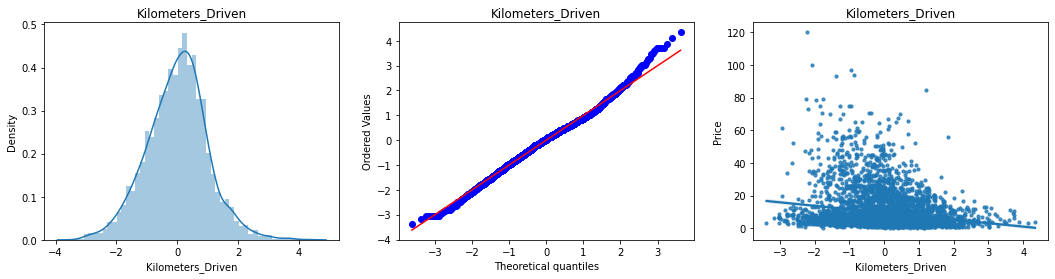

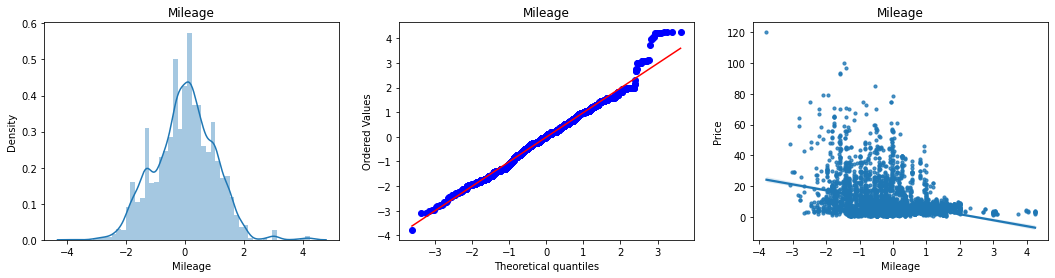

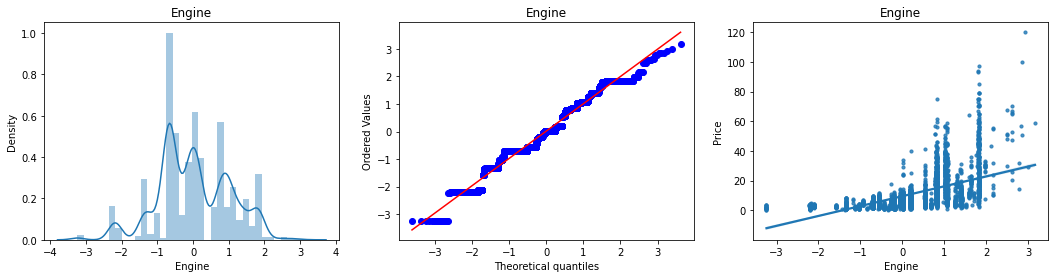

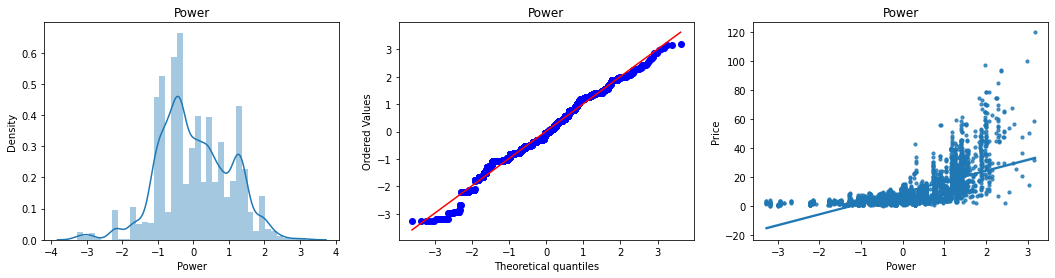

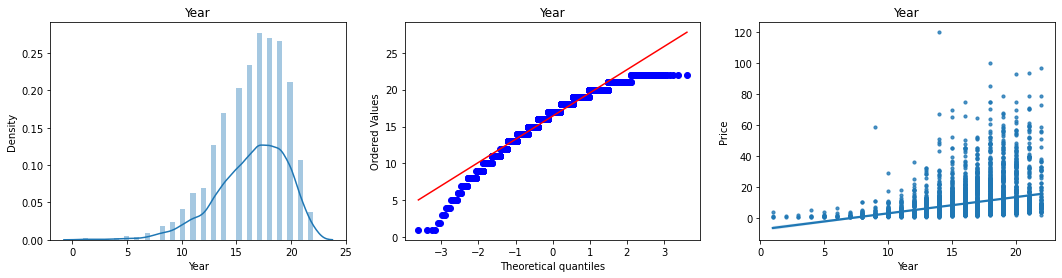

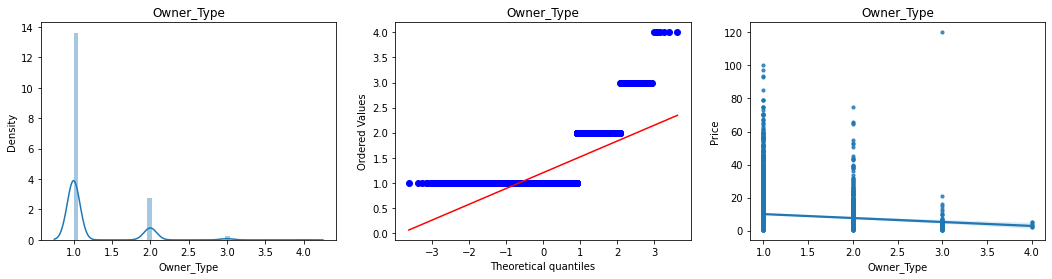

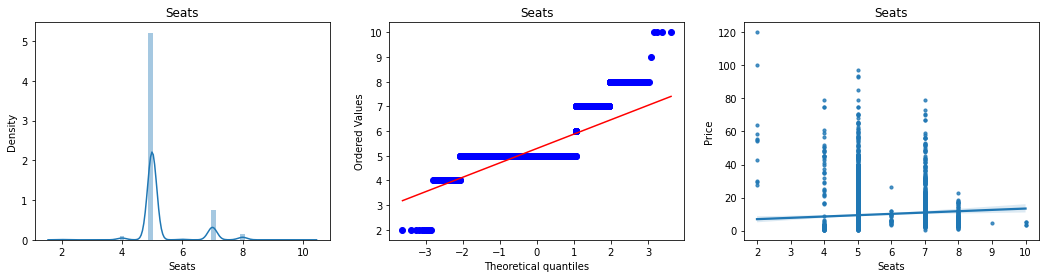

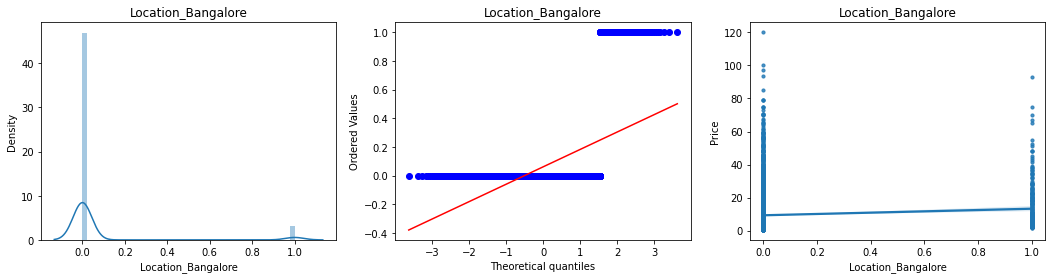

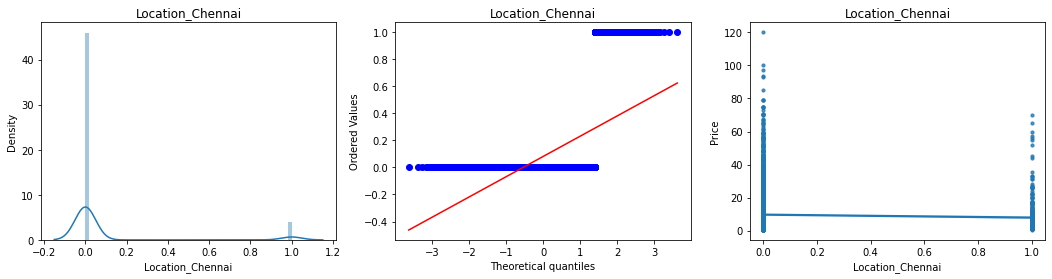

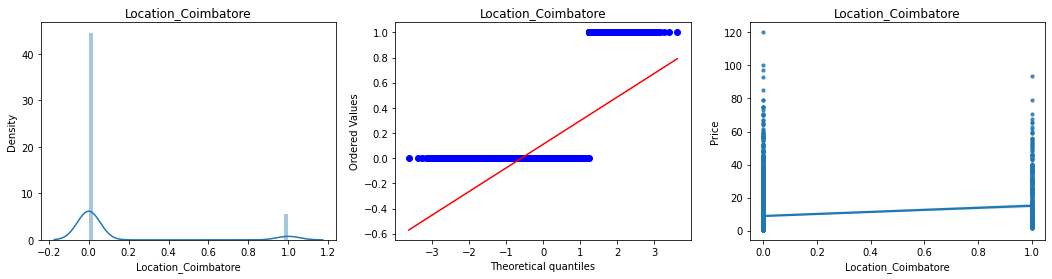

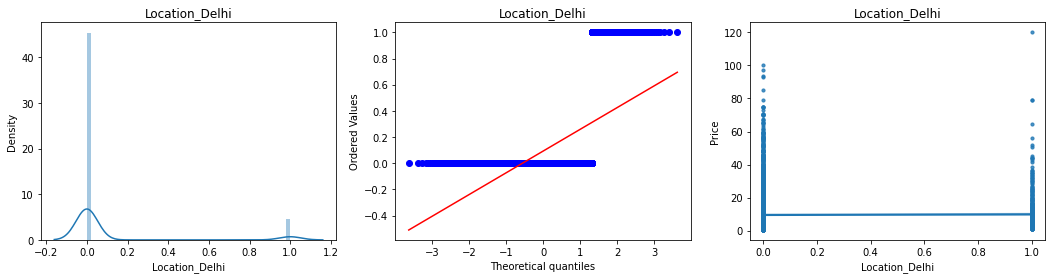

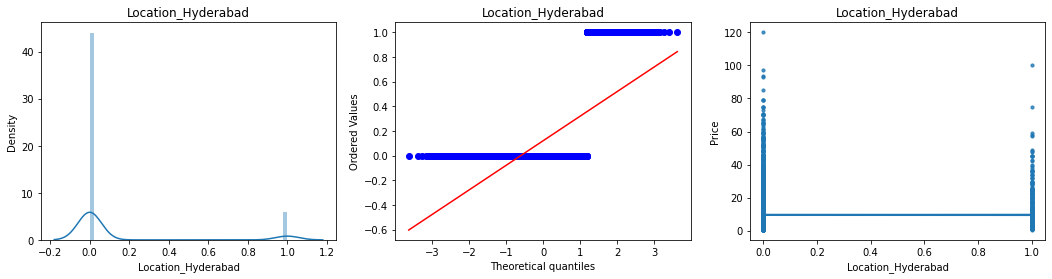

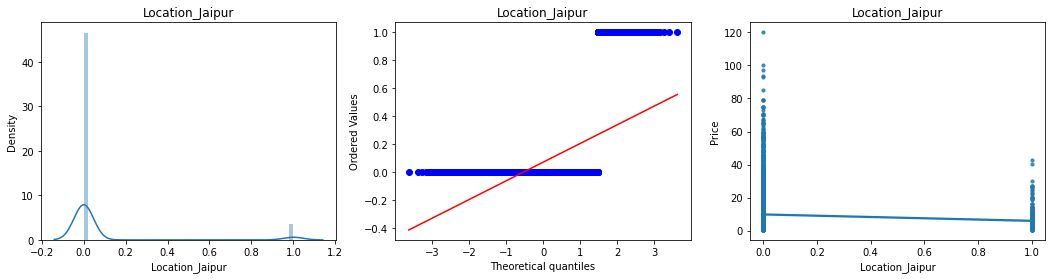

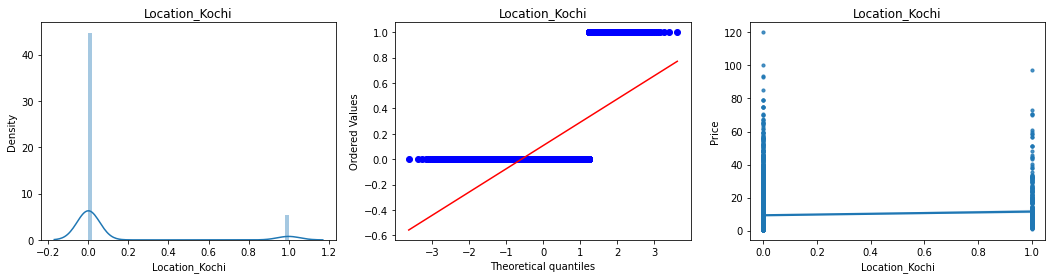

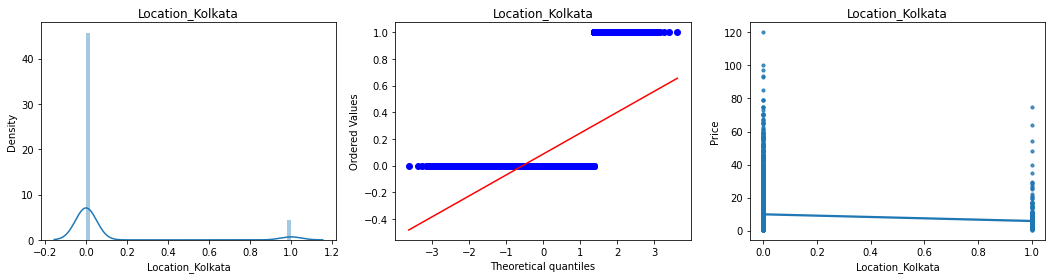

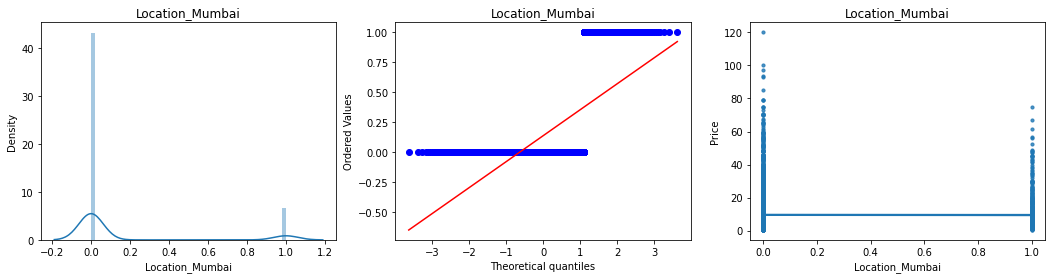

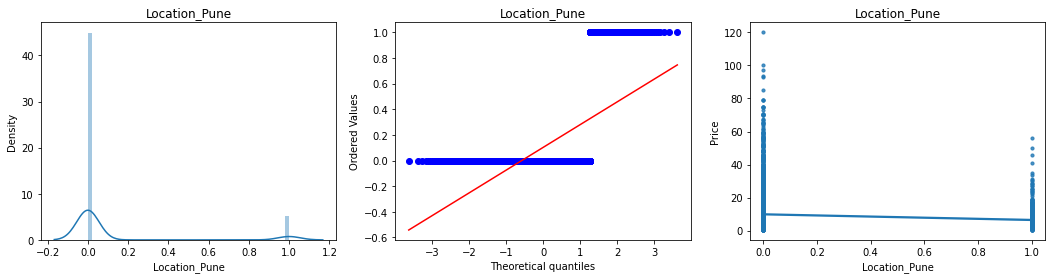

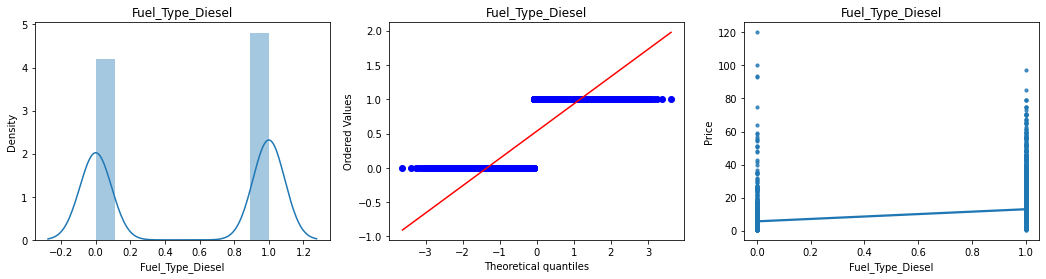

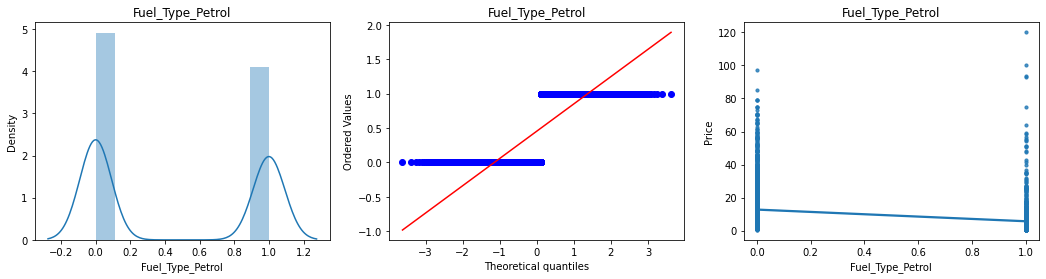

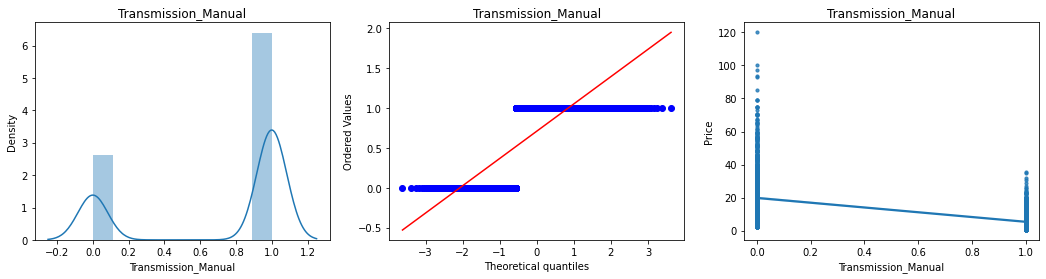

In [43]:
for col in X.columns:
    plt.figure(figsize=(18,4))
    plt.subplot(131)
    sns.distplot(X[col])
    plt.title(col)
    
    plt.subplot(132)
    stats.probplot(X[col],dist ='norm',plot = plt)
    plt.title(col)
    
    plt.subplot(133)
    sns.regplot(x=X[col],y=Y, scatter_kws={'s':10})
    plt.title(col)
    
    plt.show()

In [44]:
X

,Kilometers_Driven,Mileage,Engine,Power,Year,Owner_Type,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
5867,-0.617373,-0.249250,-0.697477,-0.806909,19,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4584,0.820948,-0.495705,0.838725,0.783183,19,1,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2451,0.306393,-0.806945,0.552472,0.621225,13,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
5120,1.670852,-1.044458,1.067883,0.751411,12,2,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1328,-0.389253,3.061085,-1.336713,-1.496963,17,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.676386,-0.249250,0.198206,0.459026,15,1,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5191,-0.382346,0.000569,-0.697477,-0.762881,19,1,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5226,0.405196,1.020369,-0.561336,-0.797501,19,1,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5390,-0.793085,-0.445522,-0.694674,-0.797501,19,1,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [45]:
a=X.columns.drop(['Seats','Year','Fuel_Type_Diesel','Engine'])
a
b=X[a]

In [46]:
import statsmodels.api as sm
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(b)
res = sm.OLS(Y.ravel(), X_endog)
model=res.fit(cov_type='HC1')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:49:31   Log-Likelihood:                -15898.
No. Observations:                4728   AIC:                         3.183e+04
Df Residuals:                    4711   BIC:                         3.194e+04
Df Model:                          16                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.7456      0.677     23.266      0.000      14.419      17.072
Kilometers_Driven      -3.0911      0.168    -18.419      0.000      -3.420      -2.762
Mileage                -1.0585      0.167     -6.338      0.000      -1.386      -0.731
Power                   4.7293      0.226     20.970      0.000       4.287       5.171
Owner_Type             -1.0396      0.288     -3.614      0.000      -1.603      -0.476
Location_Bangalore      2.3172      0.714      3.246      0.001       0.918       3.717
Location_Chennai        1.4813      0.606      2.446      0.014       0.294       2.668
Location_Coimbatore     4.2659      0.625      6.824      0.000       3.041       5.491
Location_Delhi          0.6601      0.618      1.069      0.285      -0.550       1.871
Location_Hyderabad      2.5322      0.588      4.307      0.000       1.380       3.684
Location_Jaipur         1.8525      0.565      3.281      0.001       0.746       2.959
Location_Kochi          1.8832      0.606      3.105      0.002       0.694       3.072
Location_Kolkata       -1.8057      0.559     -3.229      0.001      -2.902      -0.710
Location_Mumbai        -1.1028      0.561     -1.967      0.049      -2.201      -0.004
Location_Pune           0.9962      0.549      1.815      0.070      -0.080       2.072
Fuel_Type_Petrol       -4.9290      0.267    -18.439      0.000      -5.453      -4.405
Transmission_Manual    -5.6052      0.264    -21.261      0.000      -6.122      -5.088
==============================================================================
Omnibus:                     3209.638   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80714.010
Skew:                           2.883   Prob(JB):                         0.00
Kurtosis:                      22.403   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

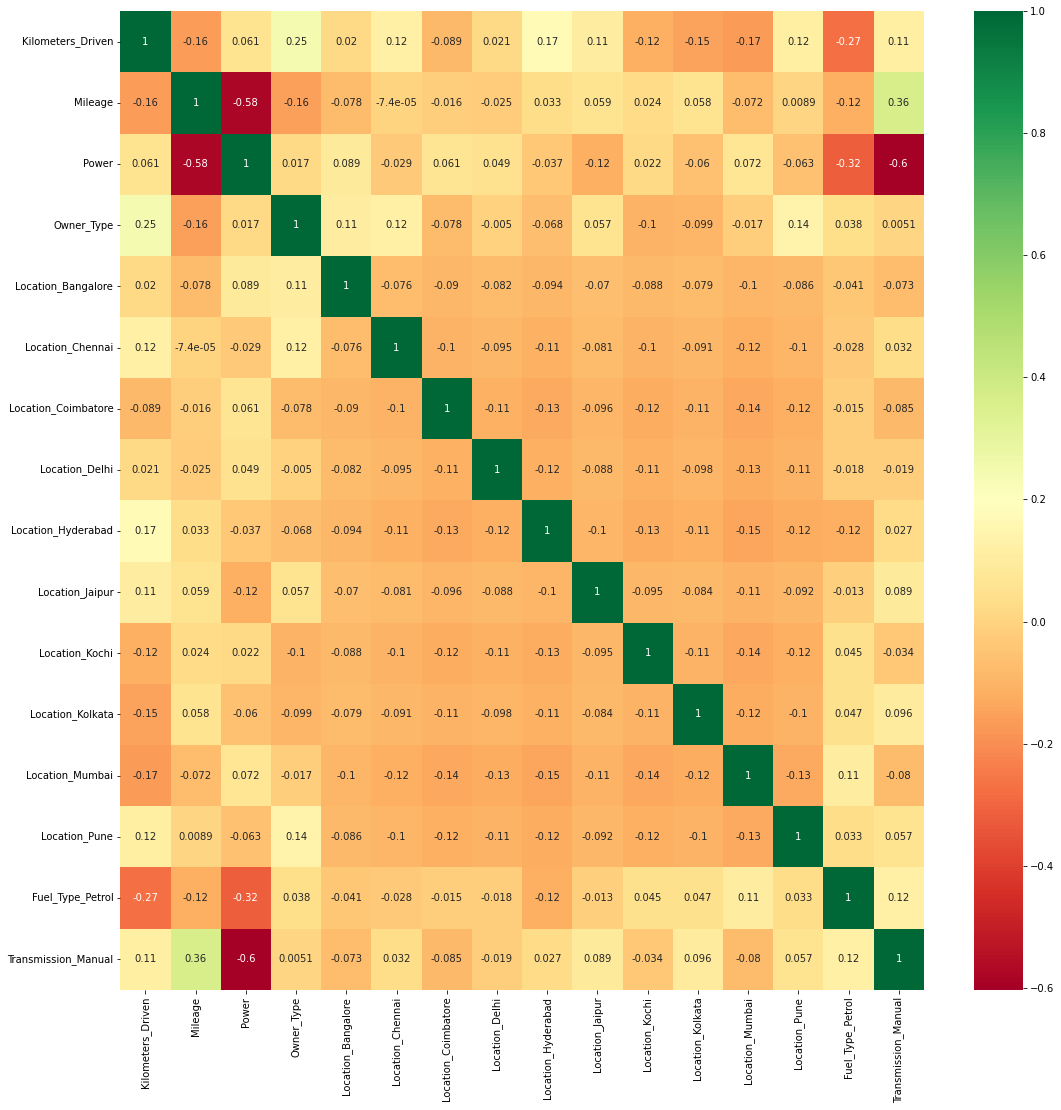

In [47]:
plt.figure(figsize=(18,18))
sns.heatmap(b.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = b.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(b.values, i)
                          for i in range(len(b.columns))]

vif_data.sort_values('VIF', ascending=False)

,feature,VIF
3,Owner_Type,7.569447
15,Transmission_Manual,5.063873
14,Fuel_Type_Petrol,2.789027
2,Power,2.548526
12,Location_Mumbai,2.326646
13,Location_Pune,2.117396
1,Mileage,1.975283
8,Location_Hyderabad,1.935130
10,Location_Kochi,1.917330
6,Location_Coimbatore,1.900702


In [49]:
b

,Kilometers_Driven,Mileage,Power,Owner_Type,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual
5867,-0.617373,-0.249250,-0.806909,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4584,0.820948,-0.495705,0.783183,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2451,0.306393,-0.806945,0.621225,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5120,1.670852,-1.044458,0.751411,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1328,-0.389253,3.061085,-1.496963,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.676386,-0.249250,0.459026,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5191,-0.382346,0.000569,-0.762881,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5226,0.405196,1.020369,-0.797501,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5390,-0.793085,-0.445522,-0.797501,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [50]:
residuals=model.resid

In [51]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.3591478912245684e-14


In [52]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

In [53]:
bp_test = het_breuschpagan(model.resid, X)

In [54]:
white_test = het_white(model.resid,  model.model.exog)

In [55]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))

{'LM Statistic': 698.302913892874, 'LM-Test p-value': 8.224806388057014e-136, 'F-Statistic': 40.79227356743624, 'F-Test p-value': 8.896461118717916e-147}
{'LM Statistic': 1519.8108056027024, 'LM-Test p-value': 2.423901791506532e-255, 'F-Statistic': 23.098006629067584, 'F-Test p-value': 1.365068874e-315}


In [56]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 0.7323297450324674), ('p-value', 0.9999999999999737)]

<AxesSubplot:ylabel='Density'>

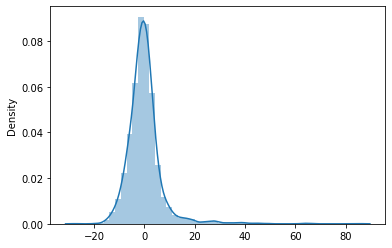

In [57]:
sns.distplot(residuals,kde=True)

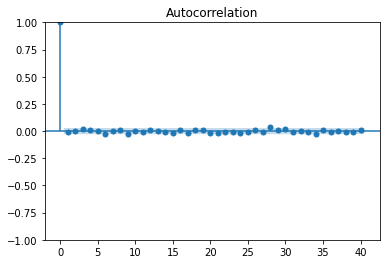

In [58]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

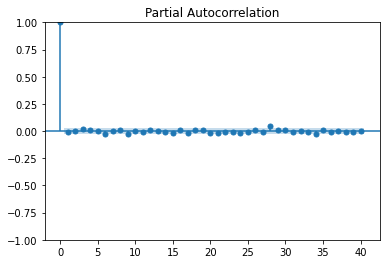

In [59]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

In [60]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)['lb_pvalue'])

0.37007647116272596

In [61]:
X

,Kilometers_Driven,Mileage,Engine,Power,Year,Owner_Type,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
5867,-0.617373,-0.249250,-0.697477,-0.806909,19,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4584,0.820948,-0.495705,0.838725,0.783183,19,1,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2451,0.306393,-0.806945,0.552472,0.621225,13,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
5120,1.670852,-1.044458,1.067883,0.751411,12,2,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1328,-0.389253,3.061085,-1.336713,-1.496963,17,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.676386,-0.249250,0.198206,0.459026,15,1,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5191,-0.382346,0.000569,-0.697477,-0.762881,19,1,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5226,0.405196,1.020369,-0.561336,-0.797501,19,1,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5390,-0.793085,-0.445522,-0.694674,-0.797501,19,1,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## EVALUATION

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# applying to linear regression on transformed data
lr = LinearRegression()

In [63]:
lr.fit(X,Y)

LinearRegression()

In [64]:
Y_pred = lr.predict(X_test)
Y_pred_train = lr.predict(X)

In [65]:
print("Test accuracy:", r2_score(Y_test,Y_pred))
print("Train accuracy:", r2_score(Y,Y_pred_train))

Test accuracy: 0.579471728419787
Train accuracy: 0.6306372181134472


In [66]:
lr.coef_

array([ -2.06555672,  -2.33308852,   0.62191154,   3.79937642,
         0.71087002,  -0.13063264,  -1.53418332,   2.13460823,
         1.45555406,   3.05488534,   0.40153382,   2.40594099,
         1.5485252 ,   0.64123575,  -1.29777359,  -1.10058218,
         0.71227797,  -5.44577381, -10.36836276,  -4.94694342])